In [ ]:
from google.colab import files

uploaded = files.upload()

Saving DataPreprocessingGraded_dataset.csv to DataPreprocessingGraded_dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv("DataPreprocessingGraded_dataset.csv")
df.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [ ]:
df.shape

(748, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      748 non-null    object 
 1   V2      748 non-null    object 
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
 5   Target  748 non-null    object 
dtypes: float64(2), object(4)
memory usage: 35.2+ KB


In [ ]:
df.describe()

,V3,V4
count,748.000000,748.000000
mean,1378.676471,34.282086
std,1459.826781,24.376714
min,250.000000,2.000000
25%,500.000000,16.000000
50%,1000.000000,28.000000
75%,1750.000000,50.000000
max,12500.000000,98.000000


In [ ]:
import numpy as np
df.replace('?', np.nan, inplace=True)
df.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,NaN,NaN,4000.0,35.0,NEGATIVE,YES
3,NaN,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [ ]:
df['V1'] = pd.to_numeric(df['V1'], errors='coerce')

In [ ]:
df['V2'] = pd.to_numeric(df['V2'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      743 non-null    float64
 1   V2      743 non-null    float64
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
 5   Target  748 non-null    object 
dtypes: float64(4), object(2)
memory usage: 35.2+ KB


In [ ]:
df['V4'].unique()

array([98., 28., 35., 45., 77.,  4., 14., 22., 58., 47., 15., 11., 48.,
       49., 16., 40., 34., 21., 26., 64., 57., 53., 69., 36.,  2., 46.,
       52., 81., 29.,  9., 74., 25., 51., 71., 23., 86., 38., 76., 70.,
       59., 82., 61., 79., 41., 33., 10., 95., 88., 19., 37., 39., 78.,
       42., 27., 24., 63., 43., 75., 73., 50., 60., 17., 72., 62., 30.,
       31., 65., 89., 87., 93., 83., 32., 12., 18., 55.,  3., 13., 54.])

In [ ]:
numeric_cols = ['V1', 'V2', 'V3', 'V4']
df_numeric = df[numeric_cols].dropna()

# Calculate variance for each numeric column
variances = df_numeric.var()

In [ ]:
variances

V1    6.562010e+01
V2    3.336704e+01
V3    2.085440e+06
V4    5.969600e+02
dtype: float64

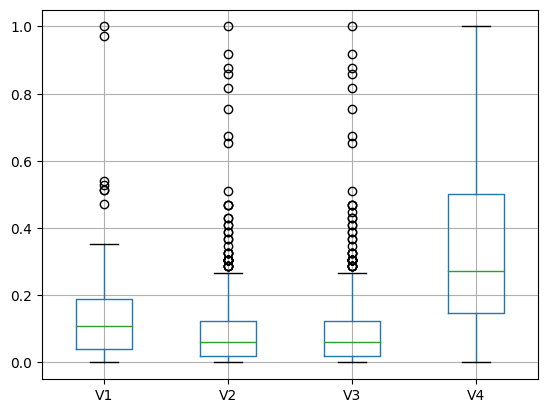

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
scaler = MinMaxScaler()
data = df[['V1', 'V2', 'V3', 'V4']]
df_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
df_scaled.boxplot()
plt.show()

In [ ]:
df['Target'].value_counts()

Target
NO     570
YES    178
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

V1        5
V2        5
V3        0
V4        0
V5        0
Target    0
dtype: int64

In [ ]:
df_copy = df.copy()
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
columns = ['V1', 'V2', 'V3', 'V4']
df_copy[columns] = pd.DataFrame(si.fit_transform(df_copy[columns]), columns=columns)
df_copy[columns].mean()

V1       9.552139
V2       5.454545
V3    1378.676471
V4      34.282086
dtype: float64

In [ ]:
df_copy = df.copy()
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3)
columns = ['V1', 'V2', 'V3', 'V4']
df_copy[columns] = pd.DataFrame(knn.fit_transform(df_copy[columns]), columns=columns)
df_copy[columns].mean()

V1       9.532977
V2       5.516043
V3    1378.676471
V4      34.282086
dtype: float64

In [ ]:
df_copy = df.copy()
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean')
columns = ['V1', 'V2', 'V3', 'V4']
df_copy[columns] = pd.DataFrame(si.fit_transform(df_copy[columns]), columns=columns)
df_copy[columns].mean()

V1       9.562584
V2       5.464334
V3    1378.676471
V4      34.282086
dtype: float64

Pipeline1

1.   SimpleImpute (Strategy = mean) - Feature index {0,1}
2.   StandardScalar - Feature index {0,1,2,3}

Pipeline2

1.   OrdinalEncoder - Feature index {4}



Feature Union - pipeline1 and pipeline2

VarianceThreshold - 0.1


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer

## Graded Assignment - 1

In [ ]:
# Define the transformations for each subset of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), [0, 1, 2, 3]),

        ('cat', OrdinalEncoder(), [4])
    ]
)

# Create the full pipeline with variance threshold
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', VarianceThreshold(threshold=0.1))
])

# Transform the data using the full pipeline
X_transformed = full_pipeline.fit_transform(df)

print(f"Number of features before VarianceThreshold: {preprocessor.transform(df).shape[1]}")
print(f"Number of features after VarianceThreshold: {X_transformed.shape[1]}")

Number of features before VarianceThreshold: 5
Number of features after VarianceThreshold: 4


## Graded Assignment - 2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# Define the transformations for each subset of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), [0, 1, 2, 3]),

        ('cat', OrdinalEncoder(), [4])
    ]
)
model = LogisticRegression()

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', RFE(estimator=LogisticRegression(), n_features_to_select=2)),
    ('classifier', LogisticRegression())
])

X = df.drop(columns=['Target'])  # Features
y = df['Target']  # Target variable
pipeline.fit(X, y)

# Retrieve the selected features from RFE
selected_features = pipeline.named_steps['feature_selection'].support_
print(selected_features)

[ True False  True False False]


## Graded Assignment - 3

In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Define the transformations for each subset of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), [0, 1, 2, 3]),

        ('cat', OrdinalEncoder(), [4])
    ]
)

X = df.drop(columns=['Target'])  # Features
y = df['Target']  # Target variable

# Fit-transform the data through the preprocessor
X_processed = preprocessor.fit_transform(X, y)

# Create SFS object
sfs = SFS(LogisticRegression(),
          k_features=2,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)
# Fit SFS
sfs.fit(X_processed, y)

# Indices of the selected features
selected_feature_indices = sfs.k_feature_idx_

print("Indices of the two most important features computed by SFS:", selected_feature_indices)

Indices of the two most important features computed by SFS: (1, 3)


## Graded Assignment - 4

In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Define the transformations for each subset of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), [0, 1, 2, 3]),

        ('cat', OrdinalEncoder(), [4])
    ]
)

X = df.drop(columns=['Target'])  # Features
y = df['Target']  # Target variable

# Fit-transform the data through the preprocessor
X_processed = preprocessor.fit_transform(X, y)

# Create SFS object
sfs = SFS(LogisticRegression(),
          k_features=2,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=5)
# Fit SFS
sfs.fit(X_processed, y)

# Indices of the selected features
selected_feature_indices = sfs.k_feature_idx_

print("Indices of the two most important features computed by SFS (backward):", selected_feature_indices)

Indices of the two most important features computed by SFS (backward): (2, 3)
